# Données météo
Data provenant de l'open data de Toulouse: https://data.toulouse-metropole.fr/explore/dataset/13-station-meteo-toulouse-pech-david/information/

In [72]:
import pandas as pd
import numpy as np

In [11]:
# lecture dans un DataFrame de Pandas
meteo = pd.read_csv(
    'data/meteo/13-station-meteo-toulouse-pech-david.csv',
    sep=';',
    encoding='UTF-8',
    parse_dates=['heure_de_paris', 'heure_utc']
)
meteo

,data,id,humidite,direction_du_vecteur_de_vent_max,pluie_intensite_max,pression,direction_du_vecteur_vent_moyen,type_de_station,pluie,direction_du_vecteur_de_rafale_de_vent_max,force_moyenne_du_vecteur_vent,force_rafale_max,temperature,heure_de_paris,heure_utc
0,1a8f553046800890abf84c00,13,80,12,0.0,99500,274,ISS,0.0,270.0,5,19,15.1,2024-04-15 12:00:00+02:00,2024-04-15 10:00:00+00:00
1,1a995aeec6f815808a103440,13,95,8,0.2,98000,176,ISS,0.2,180.0,4,13,9.1,2024-04-25 23:30:00+02:00,2024-04-25 21:30:00+00:00
2,1a7256b05ac809304b7a1800,13,89,13,0.0,99100,294,ISS,0.0,292.5,2,6,15.6,2024-03-18 14:00:00+01:00,2024-03-18 13:00:00+00:00
3,1a765671e20000b02b7e1800,13,64,15,0.0,99100,22,ISS,0.0,337.5,1,6,21.8,2024-03-22 13:30:00+01:00,2024-03-22 12:30:00+00:00
4,1a76569201f00a104b7e1400,13,62,15,0.0,99100,322,ISS,0.0,337.5,2,5,22.0,2024-03-22 13:45:00+01:00,2024-03-22 12:45:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79975,1b3a644f82c000000b600000,13,88,0,0.0,99100,0,ISS,0.0,0.0,0,0,12.0,2025-09-26 10:15:00+02:00,2025-09-26 08:15:00+00:00
79976,1b3a64cfda8800000b600000,13,81,0,0.0,99100,0,ISS,0.0,0.0,0,0,13.6,2025-09-26 11:15:00+02:00,2025-09-26 09:15:00+00:00
79977,1b3a642f5ac800000b600000,13,89,0,0.0,99100,0,ISS,0.0,0.0,0,0,11.6,2025-09-26 10:00:00+02:00,2025-09-26 08:00:00+00:00
79978,1b3a65505e4000000b600000,13,72,0,0.0,99100,0,ISS,0.0,0.0,0,0,15.7,2025-09-26 12:15:00+02:00,2025-09-26 10:15:00+00:00


In [5]:
meteo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79980 entries, 0 to 79979
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype              
---  ------                                      --------------  -----              
 0   data                                        79980 non-null  object             
 1   id                                          79980 non-null  int64              
 2   humidite                                    79980 non-null  int64              
 3   direction_du_vecteur_de_vent_max            79980 non-null  int64              
 4   pluie_intensite_max                         79980 non-null  float64            
 5   pression                                    79980 non-null  int64              
 6   direction_du_vecteur_vent_moyen             79980 non-null  int64              
 7   type_de_station                             79980 non-null  object             
 8   pluie                               

In [9]:
print(repr(meteo.iloc[0, -2]))
print(repr(meteo.iloc[2, -2]))

Timestamp('2024-04-15 12:00:00+0200', tz='UTC+02:00')
Timestamp('2024-03-18 14:00:00+0100', tz='UTC+01:00')


In [10]:
meteo.describe()

,id,humidite,direction_du_vecteur_de_vent_max,pluie_intensite_max,pression,direction_du_vecteur_vent_moyen,pluie,direction_du_vecteur_de_rafale_de_vent_max,force_moyenne_du_vecteur_vent,force_rafale_max,temperature
count,79980.0,79980.000000,79980.000000,79980.000000,79980.000000,79980.000000,79980.000000,79980.000000,79980.000000,79980.000000,79980.000000
mean,13.0,70.204189,7.481770,0.006359,97986.200300,133.576194,0.010225,168.339835,3.572968,11.452901,8.924340
std,0.0,27.656697,4.934146,0.041286,2726.498003,111.311706,0.119911,111.018283,4.141197,9.458982,20.561587
min,13.0,0.000000,0.000000,0.000000,90000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-50.000000
25%,13.0,61.000000,4.000000,0.000000,98300.000000,0.000000,0.000000,90.000000,0.000000,5.000000,7.900000
50%,13.0,79.000000,8.000000,0.000000,98800.000000,120.000000,0.000000,180.000000,2.000000,10.000000,13.500000
75%,13.0,90.000000,12.000000,0.000000,99200.000000,246.000000,0.000000,270.000000,5.000000,16.000000,19.800000
max,13.0,99.000000,15.000000,2.600000,101100.000000,360.000000,13.200000,337.500000,31.000000,72.000000,41.000000


In [15]:
temperature_threshold = -49.0
meteo_temp_50 = meteo.loc[
    meteo.temperature <= temperature_threshold
]
meteo_temp_50

,data,id,humidite,direction_du_vecteur_de_vent_max,pluie_intensite_max,pression,direction_du_vecteur_vent_moyen,type_de_station,pluie,direction_du_vecteur_de_rafale_de_vent_max,force_moyenne_du_vecteur_vent,force_rafale_max,temperature,heure_de_paris,heure_utc
82,1afc50200000000000000000,13,0,0,0.0,90000,0,ISS,0.0,0.0,0,0,-50.0,2024-07-28 02:00:00+02:00,2024-07-28 00:00:00+00:00
110,1b0157000000000000000000,13,0,0,0.0,90000,0,ISS,0.0,0.0,0,0,-50.0,2024-08-01 15:45:00+02:00,2024-08-01 13:45:00+00:00
111,1b0158000000000000000000,13,0,0,0.0,90000,0,ISS,0.0,0.0,0,0,-50.0,2024-08-01 17:45:00+02:00,2024-08-01 15:45:00+00:00
112,1b015a600000000000000000,13,0,0,0.0,90000,0,ISS,0.0,0.0,0,0,-50.0,2024-08-01 22:30:00+02:00,2024-08-01 20:30:00+00:00
127,1b0350e00000000000000000,13,0,0,0.0,90000,0,ISS,0.0,0.0,0,0,-50.0,2024-08-03 03:30:00+02:00,2024-08-03 01:30:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78855,1b2d50400000000000000000,13,0,0,0.0,90000,0,ISS,0.0,0.0,0,0,-50.0,2024-09-13 02:15:00+02:00,2024-09-13 00:15:00+00:00
78888,1b2656c00000000000000000,13,0,0,0.0,90000,0,ISS,0.0,0.0,0,0,-50.0,2024-09-06 15:15:00+02:00,2024-09-06 13:15:00+00:00
78895,1b2b54800000000000000000,13,0,0,0.0,90000,0,ISS,0.0,0.0,0,0,-50.0,2024-09-11 10:45:00+02:00,2024-09-11 08:45:00+00:00
78896,1b2b55200000000000000000,13,0,0,0.0,90000,0,ISS,0.0,0.0,0,0,-50.0,2024-09-11 12:00:00+02:00,2024-09-11 10:00:00+00:00


In [13]:
meteo.temperature <= temperature_threshold

0        False
1        False
2        False
3        False
4        False
         ...  
79975    False
79976    False
79977    False
79978    False
79979    False
Name: temperature, Length: 79980, dtype: bool

In [23]:
meteo_ok = meteo.drop(index=meteo_temp_50.index) \
    .sort_values('heure_utc')
meteo_ok

,data,id,humidite,direction_du_vecteur_de_vent_max,pluie_intensite_max,pression,direction_du_vecteur_vent_moyen,type_de_station,pluie,direction_du_vecteur_de_rafale_de_vent_max,force_moyenne_du_vecteur_vent,force_rafale_max,temperature,heure_de_paris,heure_utc
41732,1ada003259c0000140086000,13,56,4,0.0,90000,0,ISS,0.0,90.0,10,24,23.6,2019-06-26 02:00:00+02:00,2019-06-26 00:00:00+00:00
58678,1ada005259c00001400e8000,13,56,7,0.0,90000,0,ISS,0.0,157.5,10,32,23.6,2019-06-26 02:15:00+02:00,2019-06-26 00:15:00+00:00
10557,1ada007259b80001a0107400,13,55,8,0.0,90000,0,ISS,0.0,180.0,13,29,23.6,2019-06-26 02:30:00+02:00,2019-06-26 00:30:00+00:00
12465,1ada009255b80001a00c7800,13,55,6,0.0,90000,0,ISS,0.0,135.0,13,30,23.5,2019-06-26 02:45:00+02:00,2019-06-26 00:45:00+00:00
12464,1ada00b251c00001c00c8000,13,56,6,0.0,90000,0,ISS,0.0,135.0,14,32,23.4,2019-06-26 03:00:00+02:00,2019-06-26 01:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79858,1b3a6510166000000b600000,13,76,0,0.0,99100,0,ISS,0.0,0.0,0,0,14.5,2025-09-26 11:45:00+02:00,2025-09-26 09:45:00+00:00
79972,1b3a6530425000000b600000,13,74,0,0.0,99100,0,ISS,0.0,0.0,0,0,15.0,2025-09-26 12:00:00+02:00,2025-09-26 10:00:00+00:00
79978,1b3a65505e4000000b600000,13,72,0,0.0,99100,0,ISS,0.0,0.0,0,0,15.7,2025-09-26 12:15:00+02:00,2025-09-26 10:15:00+00:00
79979,1b3a6570623800000b600000,13,71,0,0.0,99100,0,ISS,0.0,0.0,0,0,15.8,2025-09-26 12:30:00+02:00,2025-09-26 10:30:00+00:00


In [24]:
meteo_ok.loc[
    meteo_ok.temperature <= temperature_threshold
]

,data,id,humidite,direction_du_vecteur_de_vent_max,pluie_intensite_max,pression,direction_du_vecteur_vent_moyen,type_de_station,pluie,direction_du_vecteur_de_rafale_de_vent_max,force_moyenne_du_vecteur_vent,force_rafale_max,temperature,heure_de_paris,heure_utc


In [25]:
meteo_ok.heure_utc

41732   2019-06-26 00:00:00+00:00
58678   2019-06-26 00:15:00+00:00
10557   2019-06-26 00:30:00+00:00
12465   2019-06-26 00:45:00+00:00
12464   2019-06-26 01:00:00+00:00
                   ...           
79858   2025-09-26 09:45:00+00:00
79972   2025-09-26 10:00:00+00:00
79978   2025-09-26 10:15:00+00:00
79979   2025-09-26 10:30:00+00:00
79778   2025-09-26 10:45:00+00:00
Name: heure_utc, Length: 72260, dtype: datetime64[ns, UTC]

In [26]:
meteo_ok['heure_utc']

41732   2019-06-26 00:00:00+00:00
58678   2019-06-26 00:15:00+00:00
10557   2019-06-26 00:30:00+00:00
12465   2019-06-26 00:45:00+00:00
12464   2019-06-26 01:00:00+00:00
                   ...           
79858   2025-09-26 09:45:00+00:00
79972   2025-09-26 10:00:00+00:00
79978   2025-09-26 10:15:00+00:00
79979   2025-09-26 10:30:00+00:00
79778   2025-09-26 10:45:00+00:00
Name: heure_utc, Length: 72260, dtype: datetime64[ns, UTC]

In [27]:
meteo_ok['heure_utc'].min(), meteo_ok['heure_utc'].max()

(Timestamp('2019-06-26 00:00:00+0000', tz='UTC'),
 Timestamp('2025-09-26 10:45:00+0000', tz='UTC'))

In [29]:
meteo_ok[['heure_utc', 'heure_de_paris', 'temperature']]

,heure_utc,heure_de_paris,temperature
41732,2019-06-26 00:00:00+00:00,2019-06-26 02:00:00+02:00,23.6
58678,2019-06-26 00:15:00+00:00,2019-06-26 02:15:00+02:00,23.6
10557,2019-06-26 00:30:00+00:00,2019-06-26 02:30:00+02:00,23.6
12465,2019-06-26 00:45:00+00:00,2019-06-26 02:45:00+02:00,23.5
12464,2019-06-26 01:00:00+00:00,2019-06-26 03:00:00+02:00,23.4
...,...,...,...
79858,2025-09-26 09:45:00+00:00,2025-09-26 11:45:00+02:00,14.5
79972,2025-09-26 10:00:00+00:00,2025-09-26 12:00:00+02:00,15.0
79978,2025-09-26 10:15:00+00:00,2025-09-26 12:15:00+02:00,15.7
79979,2025-09-26 10:30:00+00:00,2025-09-26 12:30:00+02:00,15.8


In [36]:
# Operators bitwise => elementwise (Pandas Series or numpy ndarray)
# AND vectoriel : &
# OR vectoriel : |
# NOT vectoriel : ~
meteo_aout_2025 = meteo_ok.loc[
    # selection de lignes
    (meteo_ok.heure_utc.dt.year == 2025)
    & (meteo_ok.heure_utc.dt.month == 8),
    # choix de colonnes
    ['heure_utc', 'heure_de_paris', 'temperature']
]
meteo_aout_2025

,heure_utc,heure_de_paris,temperature
41476,2025-08-01 00:00:00+00:00,2025-08-01 02:00:00+02:00,20.3
72852,2025-08-01 00:15:00+00:00,2025-08-01 02:15:00+02:00,20.1
41037,2025-08-01 00:30:00+00:00,2025-08-01 02:30:00+02:00,19.9
77424,2025-08-01 00:45:00+00:00,2025-08-01 02:45:00+02:00,19.7
77077,2025-08-01 01:00:00+00:00,2025-08-01 03:00:00+02:00,19.4
...,...,...,...
69475,2025-08-31 22:45:00+00:00,2025-09-01 00:45:00+02:00,15.6
73952,2025-08-31 23:00:00+00:00,2025-09-01 01:00:00+02:00,15.4
73954,2025-08-31 23:15:00+00:00,2025-09-01 01:15:00+02:00,15.4
69476,2025-08-31 23:30:00+00:00,2025-09-01 01:30:00+02:00,15.5


In [37]:
meteo_aout_2025.columns

Index(['heure_utc', 'heure_de_paris', 'temperature'], dtype='object')

In [38]:
meteo_aout_2025.index

Index([41476, 72852, 41037, 77424, 77077, 41038, 72857, 72859, 41039, 41040,
       ...
       78946, 74789, 47321, 78961, 47333, 69475, 73952, 73954, 69476, 78969],
      dtype='int64', length=2968)

In [41]:
meteo_ok_t = meteo_ok.set_index('heure_utc')
meteo_ok_t

,data,id,humidite,direction_du_vecteur_de_vent_max,pluie_intensite_max,pression,direction_du_vecteur_vent_moyen,type_de_station,pluie,direction_du_vecteur_de_rafale_de_vent_max,force_moyenne_du_vecteur_vent,force_rafale_max,temperature,heure_de_paris
heure_utc,,,,,,,,,,,,,,
2019-06-26 00:00:00+00:00,1ada003259c0000140086000,13,56,4,0.0,90000,0,ISS,0.0,90.0,10,24,23.6,2019-06-26 02:00:00+02:00
2019-06-26 00:15:00+00:00,1ada005259c00001400e8000,13,56,7,0.0,90000,0,ISS,0.0,157.5,10,32,23.6,2019-06-26 02:15:00+02:00
2019-06-26 00:30:00+00:00,1ada007259b80001a0107400,13,55,8,0.0,90000,0,ISS,0.0,180.0,13,29,23.6,2019-06-26 02:30:00+02:00
2019-06-26 00:45:00+00:00,1ada009255b80001a00c7800,13,55,6,0.0,90000,0,ISS,0.0,135.0,13,30,23.5,2019-06-26 02:45:00+02:00
2019-06-26 01:00:00+00:00,1ada00b251c00001c00c8000,13,56,6,0.0,90000,0,ISS,0.0,135.0,14,32,23.4,2019-06-26 03:00:00+02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-26 09:45:00+00:00,1b3a6510166000000b600000,13,76,0,0.0,99100,0,ISS,0.0,0.0,0,0,14.5,2025-09-26 11:45:00+02:00
2025-09-26 10:00:00+00:00,1b3a6530425000000b600000,13,74,0,0.0,99100,0,ISS,0.0,0.0,0,0,15.0,2025-09-26 12:00:00+02:00
2025-09-26 10:15:00+00:00,1b3a65505e4000000b600000,13,72,0,0.0,99100,0,ISS,0.0,0.0,0,0,15.7,2025-09-26 12:15:00+02:00


In [40]:
meteo_ok.set_index('heure_utc', drop=False)

,data,id,humidite,direction_du_vecteur_de_vent_max,pluie_intensite_max,pression,direction_du_vecteur_vent_moyen,type_de_station,pluie,direction_du_vecteur_de_rafale_de_vent_max,force_moyenne_du_vecteur_vent,force_rafale_max,temperature,heure_de_paris,heure_utc
heure_utc,,,,,,,,,,,,,,,
2019-06-26 00:00:00+00:00,1ada003259c0000140086000,13,56,4,0.0,90000,0,ISS,0.0,90.0,10,24,23.6,2019-06-26 02:00:00+02:00,2019-06-26 00:00:00+00:00
2019-06-26 00:15:00+00:00,1ada005259c00001400e8000,13,56,7,0.0,90000,0,ISS,0.0,157.5,10,32,23.6,2019-06-26 02:15:00+02:00,2019-06-26 00:15:00+00:00
2019-06-26 00:30:00+00:00,1ada007259b80001a0107400,13,55,8,0.0,90000,0,ISS,0.0,180.0,13,29,23.6,2019-06-26 02:30:00+02:00,2019-06-26 00:30:00+00:00
2019-06-26 00:45:00+00:00,1ada009255b80001a00c7800,13,55,6,0.0,90000,0,ISS,0.0,135.0,13,30,23.5,2019-06-26 02:45:00+02:00,2019-06-26 00:45:00+00:00
2019-06-26 01:00:00+00:00,1ada00b251c00001c00c8000,13,56,6,0.0,90000,0,ISS,0.0,135.0,14,32,23.4,2019-06-26 03:00:00+02:00,2019-06-26 01:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-26 09:45:00+00:00,1b3a6510166000000b600000,13,76,0,0.0,99100,0,ISS,0.0,0.0,0,0,14.5,2025-09-26 11:45:00+02:00,2025-09-26 09:45:00+00:00
2025-09-26 10:00:00+00:00,1b3a6530425000000b600000,13,74,0,0.0,99100,0,ISS,0.0,0.0,0,0,15.0,2025-09-26 12:00:00+02:00,2025-09-26 10:00:00+00:00
2025-09-26 10:15:00+00:00,1b3a65505e4000000b600000,13,72,0,0.0,99100,0,ISS,0.0,0.0,0,0,15.7,2025-09-26 12:15:00+02:00,2025-09-26 10:15:00+00:00


In [42]:
meteo_ok_t.loc['2025-09-26 10:45:00+00:00']

data                                           1b3a6590423800000b600000
id                                                                   13
humidite                                                             71
direction_du_vecteur_de_vent_max                                      0
pluie_intensite_max                                                 0.0
pression                                                          99100
direction_du_vecteur_vent_moyen                                       0
type_de_station                                                     ISS
pluie                                                               0.0
direction_du_vecteur_de_rafale_de_vent_max                          0.0
force_moyenne_du_vecteur_vent                                         0
force_rafale_max                                                      0
temperature                                                        15.0
heure_de_paris                                2025-09-26 12:45:0

In [43]:
meteo_ok_t.loc['2025-09-26']

,data,id,humidite,direction_du_vecteur_de_vent_max,pluie_intensite_max,pression,direction_du_vecteur_vent_moyen,type_de_station,pluie,direction_du_vecteur_de_rafale_de_vent_max,force_moyenne_du_vecteur_vent,force_rafale_max,temperature,heure_de_paris
heure_utc,,,,,,,,,,,,,,
2025-09-26 00:00:00+00:00,1b3a602f5e8800000b800000,13,81,0,0.0,99200,0,ISS,0.0,0.0,0,0,11.7,2025-09-26 02:00:00+02:00
2025-09-26 00:15:00+00:00,1b3a604f529000000b800000,13,82,0,0.0,99200,0,ISS,0.0,0.0,0,0,11.4,2025-09-26 02:15:00+02:00
2025-09-26 00:30:00+00:00,1b3a606f4e9000000b800000,13,82,0,0.0,99200,0,ISS,0.0,0.0,0,0,11.3,2025-09-26 02:30:00+02:00
2025-09-26 00:45:00+00:00,1b3a608f4a9000000b800000,13,82,0,0.0,99200,0,ISS,0.0,0.0,0,0,11.2,2025-09-26 02:45:00+02:00
2025-09-26 01:00:00+00:00,1b3a60af528800000b600000,13,81,0,0.0,99100,0,ISS,0.0,0.0,0,0,11.4,2025-09-26 03:00:00+02:00
2025-09-26 01:15:00+00:00,1b3a60cf528000000b600000,13,80,0,0.0,99100,0,ISS,0.0,0.0,0,0,11.4,2025-09-26 03:15:00+02:00
2025-09-26 01:30:00+00:00,1b3a60ef4a8800000b600000,13,81,0,0.0,99100,0,ISS,0.0,0.0,0,0,11.2,2025-09-26 03:30:00+02:00
2025-09-26 01:45:00+00:00,1b3a610f468800000b600000,13,81,0,0.0,99100,0,ISS,0.0,0.0,0,0,11.1,2025-09-26 03:45:00+02:00
2025-09-26 02:00:00+00:00,1b3a612f269000000b600000,13,82,0,0.0,99100,0,ISS,0.0,0.0,0,0,10.9,2025-09-26 04:00:00+02:00


In [44]:
meteo_ok_t.loc['2025-08']

,data,id,humidite,direction_du_vecteur_de_vent_max,pluie_intensite_max,pression,direction_du_vecteur_vent_moyen,type_de_station,pluie,direction_du_vecteur_de_rafale_de_vent_max,force_moyenne_du_vecteur_vent,force_rafale_max,temperature,heure_de_paris
heure_utc,,,,,,,,,,,,,,
2025-08-01 00:00:00+00:00,1b0160318e5006902b562000,13,74,11,0.0,99000,210,ISS,0.0,247.5,1,8,20.3,2025-08-01 02:00:00+02:00
2025-08-01 00:15:00+00:00,1b016051866006302b562000,13,76,11,0.0,99000,198,ISS,0.0,247.5,1,8,20.1,2025-08-01 02:15:00+02:00
2025-08-01 00:30:00+00:00,1b016071666806d02b502000,13,77,8,0.0,99000,218,ISS,0.0,180.0,1,8,19.9,2025-08-01 02:30:00+02:00
2025-08-01 00:45:00+00:00,1b0160915e7007b02b561400,13,78,11,0.0,99000,246,ISS,0.0,247.5,1,5,19.7,2025-08-01 02:45:00+02:00
2025-08-01 01:00:00+00:00,1b0160b1527808002b561800,13,79,11,0.0,99000,256,ISS,0.0,247.5,1,6,19.4,2025-08-01 03:00:00+02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-31 22:45:00+00:00,1b1f6b905b0866e02ab02840,13,97,8,0.2,98500,220,ISS,1.2,180.0,1,10,15.6,2025-09-01 00:45:00+02:00
2025-08-31 23:00:00+00:00,1b1f6bb0530846902a902840,13,97,8,0.2,98400,210,ISS,0.8,180.0,1,10,15.4,2025-09-01 01:00:00+02:00
2025-08-31 23:15:00+00:00,1b1f6bd0530816d02a922040,13,97,9,0.2,98400,218,ISS,0.2,202.5,1,8,15.4,2025-09-01 01:15:00+02:00


In [45]:
meteo_ok_t.loc['2025-06':'2025-08'] # .loc utilise des slices inclus-inclus (.iloc inclus-exclus)

,data,id,humidite,direction_du_vecteur_de_vent_max,pluie_intensite_max,pression,direction_du_vecteur_vent_moyen,type_de_station,pluie,direction_du_vecteur_de_rafale_de_vent_max,force_moyenne_du_vecteur_vent,force_rafale_max,temperature,heure_de_paris
heure_utc,,,,,,,,,,,,,,
2025-07-22 09:30:00+00:00,1af664f1ce380920201a1800,13,71,13,0.0,90000,292,ISS,0.0,292.5,1,6,21.3,2025-07-22 11:30:00+02:00
2025-07-22 09:45:00+00:00,1af66511da200920401a2800,13,68,13,0.0,90000,292,ISS,0.0,292.5,2,10,21.6,2025-07-22 11:45:00+02:00
2025-07-22 10:00:00+00:00,1af66531d2200920201c2c00,13,68,14,0.0,90000,292,ISS,0.0,315.0,1,11,21.4,2025-07-22 12:00:00+02:00
2025-07-22 10:15:00+00:00,1af66551e210089020182800,13,66,12,0.0,90000,274,ISS,0.0,270.0,1,10,21.8,2025-07-22 12:15:00+02:00
2025-07-22 10:30:00+00:00,1af665720a08089020181800,13,65,12,0.0,90000,274,ISS,0.0,270.0,1,6,22.2,2025-07-22 12:30:00+02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-31 22:45:00+00:00,1b1f6b905b0866e02ab02840,13,97,8,0.2,98500,220,ISS,1.2,180.0,1,10,15.6,2025-09-01 00:45:00+02:00
2025-08-31 23:00:00+00:00,1b1f6bb0530846902a902840,13,97,8,0.2,98400,210,ISS,0.8,180.0,1,10,15.4,2025-09-01 01:00:00+02:00
2025-08-31 23:15:00+00:00,1b1f6bd0530816d02a922040,13,97,9,0.2,98400,218,ISS,0.2,202.5,1,8,15.4,2025-09-01 01:15:00+02:00


In [48]:
meteo_summer_2025 = meteo_ok_t.loc[
    '2025-06':'2025-09', 
    ['heure_de_paris', 'temperature', 'pluie', 'humidite', 'pression']
]
meteo_summer_2025

,heure_de_paris,temperature,pluie,humidite,pression
heure_utc,,,,,
2025-07-22 09:30:00+00:00,2025-07-22 11:30:00+02:00,21.3,0.0,71,90000
2025-07-22 09:45:00+00:00,2025-07-22 11:45:00+02:00,21.6,0.0,68,90000
2025-07-22 10:00:00+00:00,2025-07-22 12:00:00+02:00,21.4,0.0,68,90000
2025-07-22 10:15:00+00:00,2025-07-22 12:15:00+02:00,21.8,0.0,66,90000
2025-07-22 10:30:00+00:00,2025-07-22 12:30:00+02:00,22.2,0.0,65,90000
...,...,...,...,...,...
2025-09-26 09:45:00+00:00,2025-09-26 11:45:00+02:00,14.5,0.0,76,99100
2025-09-26 10:00:00+00:00,2025-09-26 12:00:00+02:00,15.0,0.0,74,99100
2025-09-26 10:15:00+00:00,2025-09-26 12:15:00+02:00,15.7,0.0,72,99100


In [49]:
meteo_summer_2025.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6125 entries, 2025-07-22 09:30:00+00:00 to 2025-09-26 10:45:00+00:00
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   heure_de_paris  6125 non-null   object 
 1   temperature     6125 non-null   float64
 2   pluie           6125 non-null   float64
 3   humidite        6125 non-null   int64  
 4   pression        6125 non-null   int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 287.1+ KB


In [54]:
meteo_summer_2025.heure_de_paris = pd.to_datetime(meteo_summer_2025.heure_de_paris)
meteo_summer_2025.heure_de_paris

heure_utc
2025-07-22 09:30:00+00:00   2025-07-22 11:30:00+02:00
2025-07-22 09:45:00+00:00   2025-07-22 11:45:00+02:00
2025-07-22 10:00:00+00:00   2025-07-22 12:00:00+02:00
2025-07-22 10:15:00+00:00   2025-07-22 12:15:00+02:00
2025-07-22 10:30:00+00:00   2025-07-22 12:30:00+02:00
                                       ...           
2025-09-26 09:45:00+00:00   2025-09-26 11:45:00+02:00
2025-09-26 10:00:00+00:00   2025-09-26 12:00:00+02:00
2025-09-26 10:15:00+00:00   2025-09-26 12:15:00+02:00
2025-09-26 10:30:00+00:00   2025-09-26 12:30:00+02:00
2025-09-26 10:45:00+00:00   2025-09-26 12:45:00+02:00
Name: heure_de_paris, Length: 6125, dtype: datetime64[ns, UTC+02:00]

<Axes: xlabel='heure_utc'>

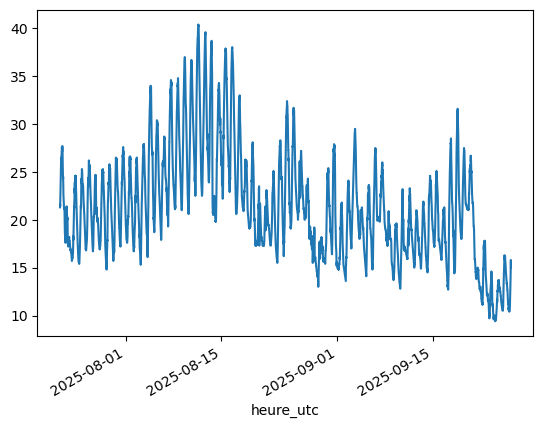

In [55]:
meteo_summer_2025.temperature.plot()

<Axes: xlabel='heure_utc'>

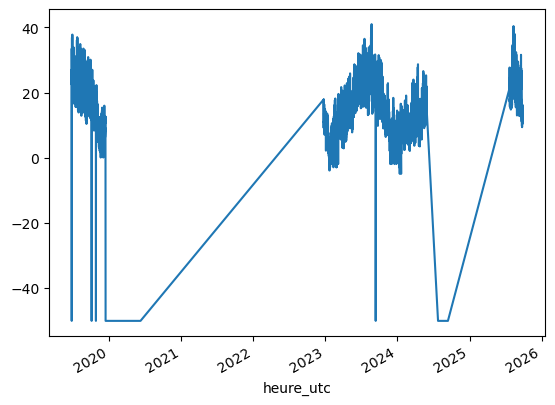

In [63]:
meteo.set_index('heure_utc').sort_index().temperature.plot()

<Axes: xlabel='heure_utc'>

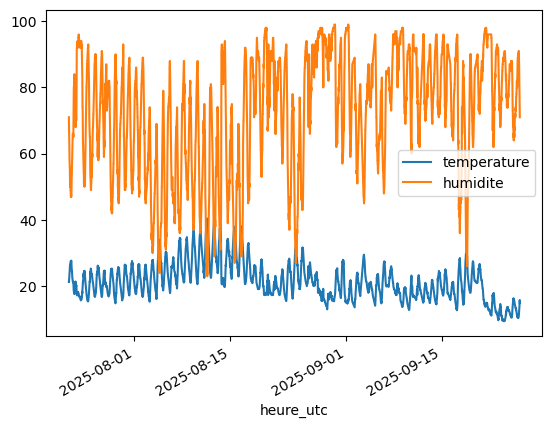

In [61]:
meteo_summer_2025[['temperature', 'humidite']].plot()

In [66]:
meteo_summer_2025.groupby(pd.Grouper(freq='1D')).max()

,heure_de_paris,temperature,pluie,humidite,pression
heure_utc,,,,,
2025-07-22 00:00:00+00:00,2025-07-23 01:45:00+02:00,27.7,0.0,71,98700
2025-07-23 00:00:00+00:00,2025-07-24 01:45:00+02:00,21.4,1.4,96,98800
2025-07-24 00:00:00+00:00,2025-07-25 01:45:00+02:00,24.6,0.0,94,99000
2025-07-25 00:00:00+00:00,2025-07-26 01:45:00+02:00,25.3,0.0,93,99100
2025-07-26 00:00:00+00:00,2025-07-27 01:45:00+02:00,26.2,0.0,90,99200
...,...,...,...,...,...
2025-09-22 00:00:00+00:00,2025-09-23 01:45:00+02:00,17.8,0.4,96,99000
2025-09-23 00:00:00+00:00,2025-09-24 01:45:00+02:00,14.6,0.0,93,99300
2025-09-24 00:00:00+00:00,2025-09-25 01:45:00+02:00,13.7,0.0,91,99400


In [67]:
meteo_summer_2025.groupby(pd.Grouper(freq='1D')).temperature.max()

heure_utc
2025-07-22 00:00:00+00:00    27.7
2025-07-23 00:00:00+00:00    21.4
2025-07-24 00:00:00+00:00    24.6
2025-07-25 00:00:00+00:00    25.3
2025-07-26 00:00:00+00:00    26.2
                             ... 
2025-09-22 00:00:00+00:00    17.8
2025-09-23 00:00:00+00:00    14.6
2025-09-24 00:00:00+00:00    13.7
2025-09-25 00:00:00+00:00    16.3
2025-09-26 00:00:00+00:00    15.8
Freq: D, Name: temperature, Length: 67, dtype: float64

In [69]:
stats = meteo_summer_2025.groupby(pd.Grouper(freq='1D'))[['temperature', 'pluie']].max()
stats

,temperature,pluie
heure_utc,,
2025-07-22 00:00:00+00:00,27.7,0.0
2025-07-23 00:00:00+00:00,21.4,1.4
2025-07-24 00:00:00+00:00,24.6,0.0
2025-07-25 00:00:00+00:00,25.3,0.0
2025-07-26 00:00:00+00:00,26.2,0.0
...,...,...
2025-09-22 00:00:00+00:00,17.8,0.4
2025-09-23 00:00:00+00:00,14.6,0.0
2025-09-24 00:00:00+00:00,13.7,0.0


<Axes: xlabel='heure_utc'>

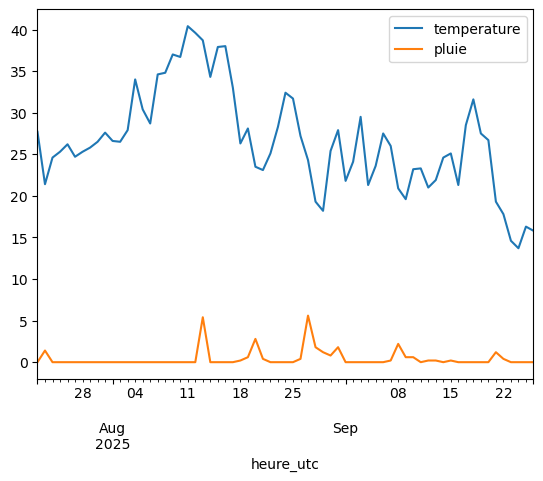

In [70]:
stats.plot()

In [76]:
stats = meteo_summer_2025.groupby(pd.Grouper(freq='1D')) \
        .agg({
            'temperature': ['min', 'max', np.ptp],
            'pluie': 'sum',
            'pression': ['min', 'max', 'mean'],
        })
stats

temperature            pluie pression         \
                                  min   max  ptp   sum      min    max   
heure_utc                                                                
2025-07-22 00:00:00+00:00        21.3  27.7  6.4   0.0    90000  98700   
2025-07-23 00:00:00+00:00        16.8  21.4  4.6   2.2    98600  98800   
2025-07-24 00:00:00+00:00        15.7  24.6  8.9   0.0    98700  99000   
2025-07-25 00:00:00+00:00        15.4  25.3  9.9   0.0    98900  99100   
2025-07-26 00:00:00+00:00        16.8  26.2  9.4   0.0    99100  99200   
...                               ...   ...  ...   ...      ...    ...   
2025-09-22 00:00:00+00:00        11.1  17.8  6.7   0.8    98700  99000   
2025-09-23 00:00:00+00:00         9.6  14.6  5.0   0.0    99000  99300   
2025-09-24 00:00:00+00:00         9.4  13.7  4.3   0.0    99200  99400   
2025-09-25 00:00:00+00:00        10.5  16.3  5.8   0.0    99100  99300   
2025-09-26 00:00:00+00:00        10.4  15.8  5.4   0.0    99000  99200   

                                         
                                   mean  
heure_utc                                
2025-07-22 00:00:00+00:00  91800.000000  
2025-07-23 00:00:00+00:00  98738.541667  
2025-07-24 00:00:00+00:00  98841.666667  
2025-07-25 00:00:00+00:00  99009.375000  
2025-07-26 00:00:00+00:00  99142.708333  
...                                 ...  
2025-09-22 00:00:00+00:00  98817.708333  
2025-09-23 00:00:00+00:00  99179.166667  
2025-09-24 00:00:00+00:00  99260.416667  
2025-09-25 00:00:00+00:00  99209.375000  
2025-09-26 00:00:00+00:00  99102.272727  

[67 rows x 7 columns]

Voir aussi: `pd.concat()`, `.join()`